# Outputs a summary of each variable to a single text file,

Download the iris data set using SKLEARN

[Link] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Recource to easily read CSV

[Link] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
# import Pandas to load the datasets
import pandas as pd

# Import sklearn
import sklearn as skl


In [3]:
# Load dataset. This command loads the iris data set and its features. 
data = skl.datasets.load_iris()

In [4]:
# print
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  




[Link] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [5]:
# load the iris dataset through Pandas CVS
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

Using the df.describe(): function here so that it gives us summary for  dataset. It shows statistics to review such as the count, mean, standard deviation, min, max, and quartiles for each feature. 


Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [6]:
# Summerise the data set
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using summary = to store the results a a variable that we can call back to later

In [7]:
# Store the results as a variable
summary = df.describe()

Using describe() to produce a table, and then using to_string() to convert it into  readable string format. Then storing that string in a variable using summary_txt = 


[Link] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html#

Trouble shooting - got a name error running the below code. Got this as I wasn't working with "DataFrame" anymore. I stored it as the variable "summary" in the cell above, which made the variable summary a Pandas Dataframe. So I needed to to change it to run to_string() correctly.

Found this resource helpful to fix this

[Link] https://stackoverflow.com/questions/66317262/pandas-df-dataframe-is-not-defined#:~:text=That%20NameError%20you%27re%20getting%20happens%20because%20you%27re%20referring,Python%22%20on%20Google%20to%20look%20for%20more%20info.


In [8]:
# Save the summary to a text file
# summary_txt = DataFrame.to_string()

# NameError: name 'DataFrame' is not defined

In [9]:
# Save the summary to a text file
summary_txt = summary.to_string()


file_path = states the path where I want to save the summary file. I have set it so that the file will be saved in the current working directory with the name iris_summary.txt.

[Link] https://www.delftstack.com/howto/python/set-file-path-python/

In [10]:
# Define the path where the file will be saved
file_path = 'iris_summary.txt'


This opens a file for writing. If the file doesn't exist, it will be created. If it does exist, the content will be overwritten ('w' stands for write mode).

[Link] https://www.geeksforgeeks.org/file-handling-python/

In [11]:
# Write the summary to the text file
with open(file_path, 'w') as f:
    f.write(summary_txt)


The print function along with the f string will print a message to the terminal, confirming that the summary has been successfully saved to the file. 

Section 2.4.3. f-strings on the below rescource 

[Link] https://docs.python.org/3/reference/lexical_analysis.html#f-strings

In [12]:
print(f"Summary saved to {file_path}")


Summary saved to iris_summary.txt


# Saves a histogram of each variable to png file

Importing matplotlib.pyplot as plt. I am using the module pyplot to create plots and figures. This will create the histogram

[Link]https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py

In [13]:
# Install packages
import matplotlib.pyplot as plt


Using Numpy to handle arrays for the dataset

[Link] https://numpy.org/doc/2.2/user/absolute_beginners.html

In [14]:
# Install packages
import numpy as np


In [15]:
# Import data set
from sklearn.datasets import load_iris



data holds the features (input variables) of the Iris dataset. It's a 2D array where each row represents an iris flower and each column represents a feature (e.g., sepal length, sepal width, etc.).

In [16]:
# Load data set
iris = load_iris()

data = iris.data


feature_names stores the list of names of the features (i.e., the column names of iris.data). These names correspond to the measurements of the iris flowers, such as sepal length (cm), sepal width (cm), etc.

In [17]:
feature_names = iris.feature_names


Using the enumerate function is useful here as it begins a for loop that iterates over each feature in the feature_names list.

enumerate(feature_names) returns both the index (i) and the name of the feature (feature) for each iteration.

This allows me to create a separate histogram for each feature.

[Link] https://www.geeksforgeeks.org/what-does-the-enumerate-function-in-python-do/

Using the plt.figure function creates a new figure, which is like a blank canvas for each histogram.

Using figsize=(6, 4) sets the size of the figure to 6 inches by 4 inches. 

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

In [18]:
# Plot and save histograms for each feature
for i, feature in enumerate(feature_names):
    # Create a new figure for each histogram
    plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Using the plt.hist(data[:, i], ...) function to create a histogram for the feature at index i. 
The data[:, i] slices the dataset to get the i-th column, which reflects the data for a specific feature 

bins= I set the number of bins to 20 

color= I set the colour of the bars to pink.

edgecolor=' I set colour of the edges of the bars to purple.

[Link] https://www.bing.com/search?pglt=2083&q=Matplotlib+hist()+Function&cvid=b126dbe119e4411db1b38b1c86d2f502&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMggIAhDpBxj8VdIBBzg0NmowajGoAgCwAgA&FORM=ANNAB1&PC=U531

Using the function plt.xlabel(feature) to add a label to the x-axis of the histogram. This is set to show the feature data

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html

Using the function plt.ylabel("Frequency") to add a label to the y-axis of the histogram. This is set to show the the frequency of the feature's measurements 


[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

Using plt.title(f"Histogram of {feature}") to set the titleof the plot. I am using an f - string to add the name of the feature.

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html

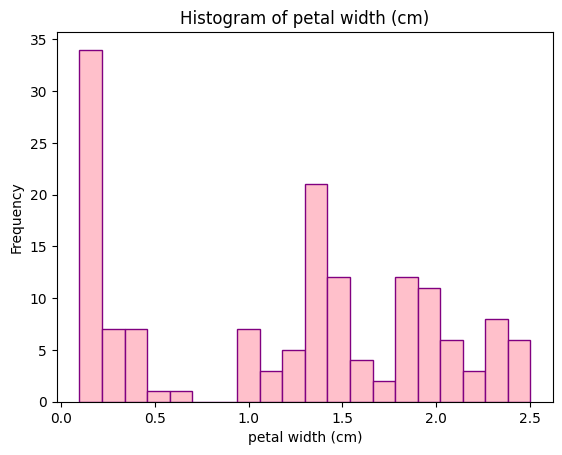

In [20]:
# Plot the histogram for the feature
plt.hist(data[:, i], bins=20, color='pink', edgecolor='purple')

# Add labels for X axis
plt.xlabel(feature)

# Add labels for Y axis
plt.ylabel("Frequency")

# Add a title
plt.title(f"Histogram of {feature}")

# Show
plt.show()


Doing a test to see the histograms generated. Next step is researching how to convert them into PNG files